In [15]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import manifold
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [16]:
pca = PCA(n_components=32).fit(x_train)

In [17]:
simple_encoder = keras.models.load_model("models/simple_encoder.h5")
deep_encoder = keras.models.load_model("models/deep_encoder.h5")

/usr/local/lib/python3.6/dist-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


t-SNE: 2.1e+02 sec
t-SNE: 2.1e+02 sec
t-SNE: 2.1e+02 sec


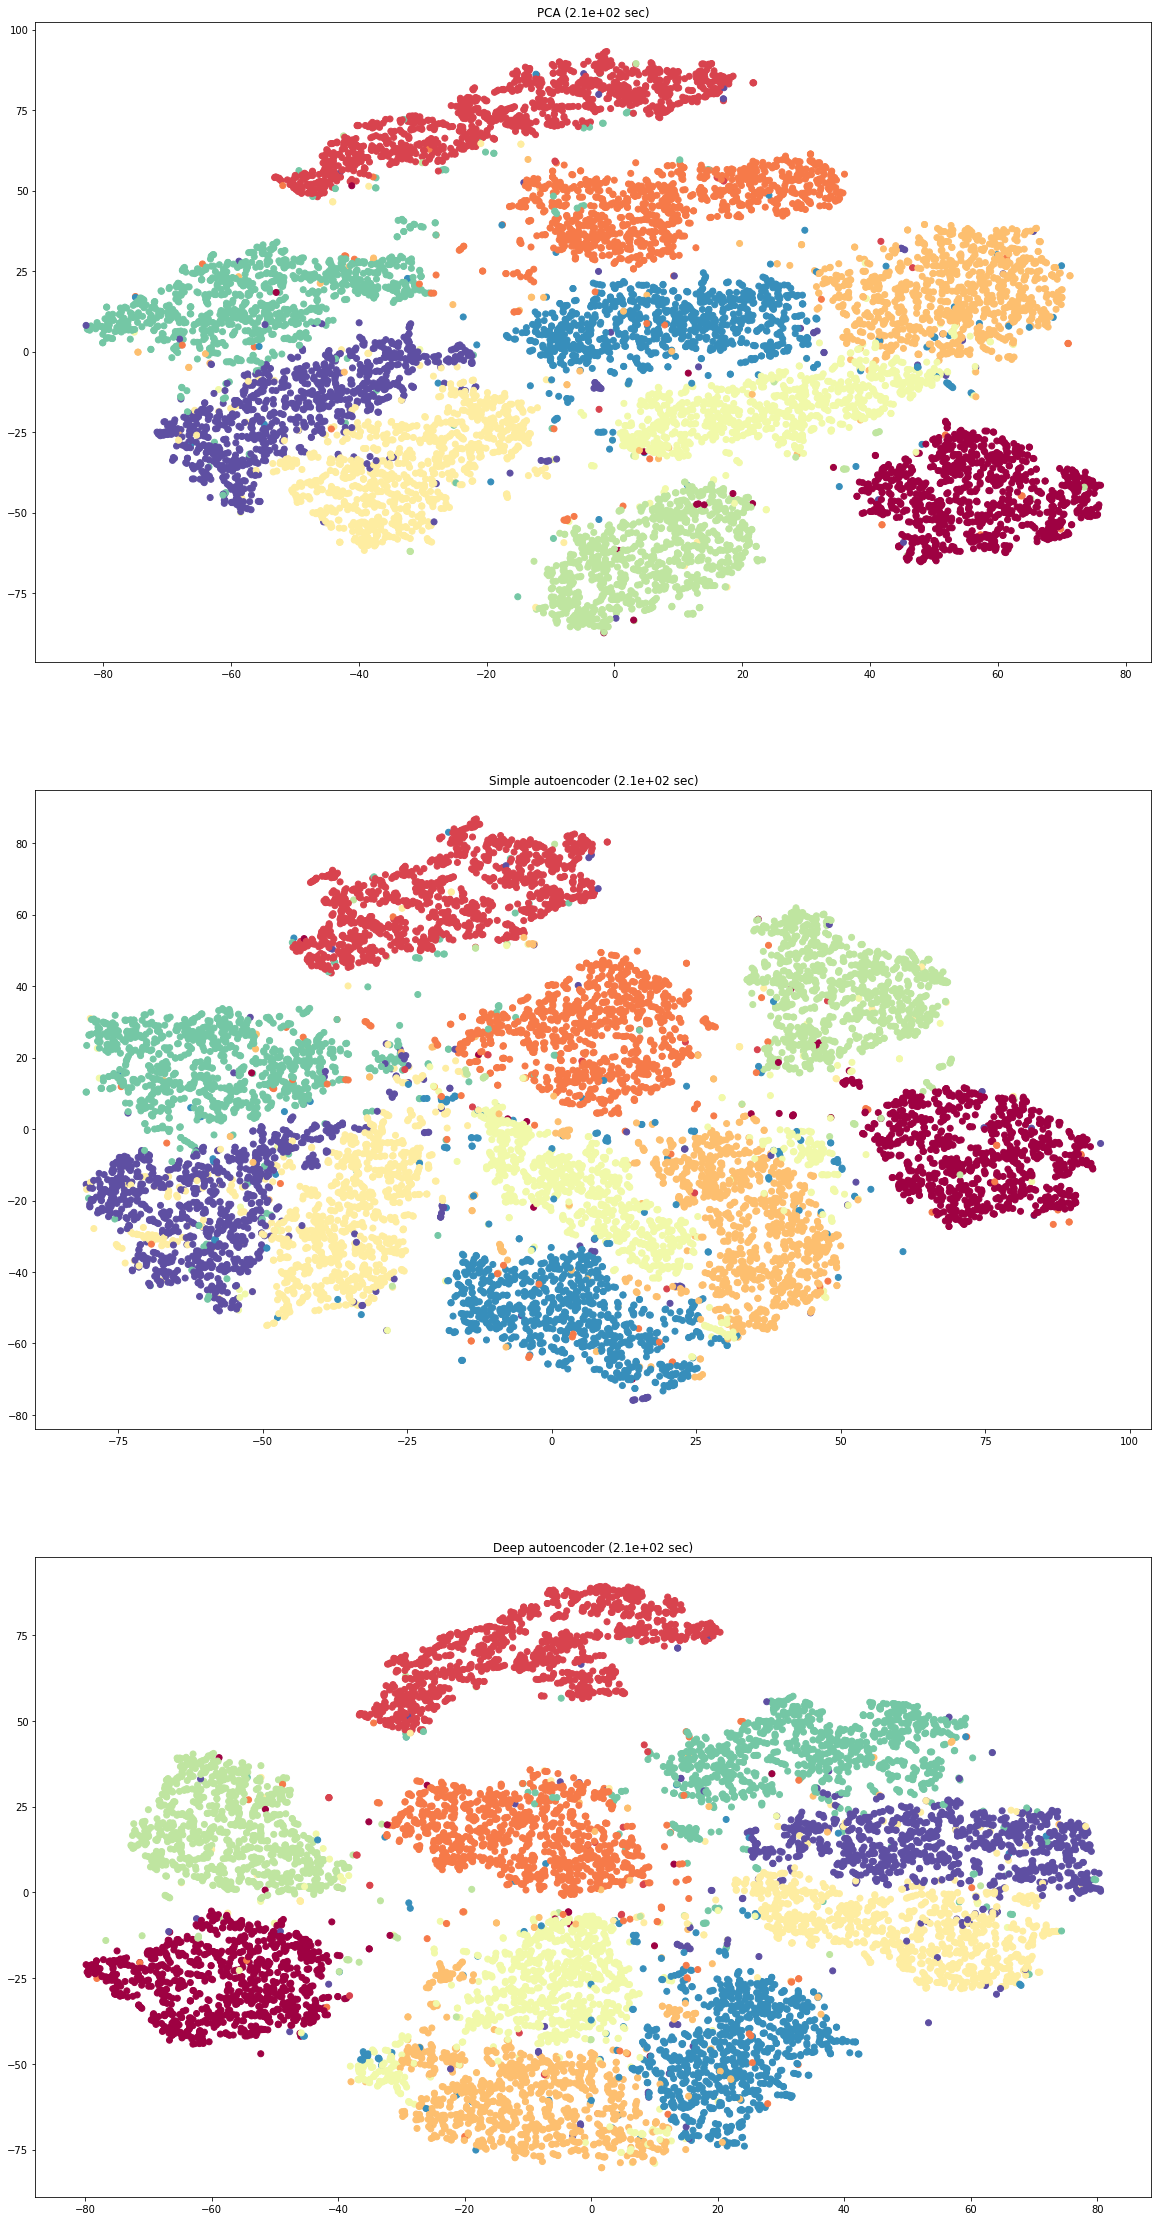

In [21]:
x_test_pca_vec = pca.transform(x_test)
x_test_simple_code = simple_encoder.predict(x_test)
x_test_deep_code = deep_encoder.predict(x_test)

fig = plt.figure(figsize=(20, 40))

ax = plt.subplot(3, 1, 1)

t0 = time()
tsne = manifold.TSNE(n_components=2)
Y = tsne.fit_transform(x_test_pca_vec)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=y_test, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0))
ax = plt.subplot(3, 1, 2)

t0 = time()
tsne = manifold.TSNE(n_components=2)
Y = tsne.fit_transform(x_test_simple_code)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=y_test, cmap=plt.cm.Spectral)
plt.title("Simple autoencoder (%.2g sec)" % (t1 - t0))
ax = plt.subplot(3, 1, 3)

t0 = time()
tsne = manifold.TSNE(n_components=2)
Y = tsne.fit_transform(x_test_deep_code)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=y_test, cmap=plt.cm.Spectral)
plt.title("Deep autoencoder (%.2g sec)" % (t1 - t0))
plt.show()